# Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya


**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

## 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

## 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

## 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

## 2.1) Reading the Data

### 2.1.1) Installations

In [1]:
# # installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl

### 2.1.2) Importing Relevant Libraries

In [2]:
# importing necessary libraries
import requests, json
import urllib
import urllib.request
import urllib.error
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### 2.1.3) Reading the Data

Observation: we will work with

In [3]:
# Reading downloaded relevant data
malaria_df, meta = pyreadstat.read_sav("data/malaria variables.SAV")
# Preview
malaria_df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dimensions
malaria_df.shape

(7952, 1955)

In [5]:
# Data summary
malaria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Columns: 1955 entries, HHID to SML16A$24
dtypes: float64(1929), object(26)
memory usage: 118.6+ MB


In [6]:
# Statistical summary
malaria_df.describe()

,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
count,7952.000000,7952.000000,7952.000000,7952.000000,7.952000e+03,7952.000000,7952.0,7952.000000,7952.000000,7952.000000,...,12.000000,6.000000,6.000000,5.000000,2.000000,1.0,1.0,0.0,0.0,1.0
mean,3734.393360,65.458249,1.469064,3734.393360,1.000000e+06,11.386444,2020.0,1451.386444,44161.558602,3.936368,...,75.833333,31.833333,79.833333,81.400000,89.500000,65.0,42.0,NaN,NaN,22.0
std,2618.926631,53.380244,0.691540,2618.926631,1.554606e+06,0.486965,0.0,0.486965,11.489709,2.463717,...,46.863115,24.210879,48.255224,58.217695,34.648232,NaN,NaN,NaN,NaN,NaN
min,2.000000,1.000000,1.000000,2.000000,1.178700e+04,11.000000,2020.0,1451.000000,44144.000000,1.000000,...,6.000000,8.000000,33.000000,13.000000,65.000000,65.0,42.0,NaN,NaN,22.0
25%,1807.000000,28.000000,1.000000,1807.000000,2.829410e+05,11.000000,2020.0,1451.000000,44151.000000,2.000000,...,47.250000,19.750000,46.250000,41.000000,77.250000,65.0,42.0,NaN,NaN,22.0
50%,3293.000000,58.000000,1.000000,3293.000000,5.517490e+05,11.000000,2020.0,1451.000000,44160.000000,4.000000,...,62.000000,24.500000,63.500000,79.000000,89.500000,65.0,42.0,NaN,NaN,22.0
75%,4939.000000,93.000000,2.000000,4939.000000,9.834160e+05,12.000000,2020.0,1452.000000,44172.000000,5.000000,...,119.750000,35.250000,107.000000,114.000000,101.750000,65.0,42.0,NaN,NaN,22.0
max,9186.000000,2172.000000,10.000000,9186.000000,1.409980e+07,12.000000,2020.0,1452.000000,44185.000000,24.000000,...,144.000000,77.000000,157.000000,160.000000,114.000000,65.0,42.0,NaN,NaN,22.0


## 2.2) Data Cleaning

In [7]:
# column_list = ['SH119', 'SH130$1', 'SH130$2', 'SH130$3', 'SH130$4', 'SH130$5', 'SH130$6', 'SH130$7', 'HML32$01', 'HML32$02', 'HML32$03', 
#               'HML32$04', 'HML32$05', 'HML32$06', 'HML32$07', 'HML32$08', 'HML32$09', 'HML32$10', 'HML32$11', 'HML32$12', 'HML32$13', 
#               'HML32$14', 'HML32$15', 'HML32$16', 'HML32$17', 'HML32$18', 'HML32$19', 'HML32$20', 'HML32$21', 'HML32$22', 'HML32$23', 
#               'HML32$24', 'HML35$01', 'HML35$02', 'HML35$03', 'HML35$04', 'HML35$05', 'HML35$06', 'HML35$07', 'HML35$08', 'HML35$09', 
#               'HML35$10', 'HML35$11', 'HML35$12', 'HML35$13', 'HML35$14', 'HML35$15', 'HML35$16', 'HML35$17', 'HML35$18', 'HML35$19', 
#               'HML35$20', 'HML35$21', 'HML35$22', 'HML35$23', 'HML35$24', 'HML33$01', 'HML33$02', 'HML33$03', 'HML33$04', 'HML33$05', 
#               'HML33$06', 'HML33$07', 'HML33$08', 'HML33$09', 'HML33$10', 'HML33$11', 'HML33$12', 'HML33$13', 'HML33$14', 'HML33$15', 
#               'HML33$16', 'HML33$17', 'HML33$18', 'HML33$19', 'HML33$20', 'HML33$21', 'HML33$22', 'HML33$23', 'HML33$24', 'HC57$01', 
#               'HC57$02', 'HC57$03', 'HC57$04', 'HC57$05', 'HC57$06', 'HC57$07', 'HC57$08', 'HC57$09', 'HC57$10', 'HC57$11', 'HC57$12', 
#               'HC57$13', 'HC57$14', 'HC57$15', 'HC57$16', 'HC57$17', 'HC57$18', 'HC57$19', 'HC57$20', 'SB115A$01', 'SB115A$02', 
#               'SB115A$03', 'SB115A$04', 'SB115A$05', 'SB115A$06', 'SB115A$07', 'SB115A$08', 'SB115A$09', 'SB115A$10', 'SB115A$11', 
#               'SB115A$12', 'SB115A$13', 'SB115A$14', 'SB115A$15', 'SB115A$16', 'SB115A$17', 'SB115A$18', 'SB115A$19', 'SB115A$20', 
#               'SB115B$01', 'SB115B$02', 'SB115B$03', 'SB115B$04', 'SB115B$05', 'SB115B$06', 'SB115B$07', 'SB115B$08', 'SB115B$09', 
#               'SB115B$10', 'SB115B$11', 'SB115B$12', 'SB115B$13', 'SB115B$14', 'SB115B$15', 'SB115B$16', 'SB115B$17', 'SB115B$18', 
#               'SB115B$19', 'SB115B$20', 'SB115C$01', 'SB115C$02', 'SB115C$03', 'SB115C$04', 'SB115C$05', 'SB115C$06', 'SB115C$07', 
#               'SB115C$08', 'SB115C$09', 'SB115C$10', 'SB115C$11', 'SB115C$12', 'SB115C$13', 'SB115C$14', 'SB115C$15', 'SB115C$16', 
#               'SB115C$17', 'SB115C$18', 'SB115C$19', 'SB115C$20', 'SB115D$01', 'SB115D$02', 'SB115D$03', 'SB115D$04', 'SB115D$05', 
#               'SB115D$06', 'SB115D$07', 'SB115D$08', 'SB115D$09', 'SB115D$10', 'SB115D$11', 'SB115D$12', 'SB115D$13', 'SB115D$14', 
#               'SB115D$15', 'SB115D$16', 'SB115D$17', 'SB115D$18', 'SB115D$19', 'SB115D$20', 'SB115E$01', 'SB115E$02', 'SB115E$03', 
#               'SB115E$04', 'SB115E$05', 'SB115E$06', 'SB115E$07', 'SB115E$08', 'SB115E$09', 'SB115E$10', 'SB115E$11', 'SB115E$12', 
#               'SB115E$13', 'SB115E$14', 'SB115E$15', 'SB115E$16', 'SB115E$17', 'SB115E$18', 'SB115E$19', 'SB115E$20', 'SB115F$01', 
#               'SB115F$02', 'SB115F$03', 'SB115F$04', 'SB115F$05', 'SB115F$06','SB115F$07', 'SB115F$08', 'SB115F$09', 'SB115F$10', 
#               'SB115F$11', 'SB115F$12', 'SB115F$13', 'SB115F$14', 'SB115F$15', 'SB115F$16', 'SB115F$17', 'SB115F$18', 'SB115F$19', 
#               'SB115F$20', 'SB115G$01', 'SB115G$02', 'SB115G$03', 'SB115G$04', 'SB115G$05', 'SB115G$06', 'SB115G$07', 'SB115G$08', 
#               'SB115G$09', 'SB115G$10', 'SB115G$11', 'SB115G$12', 'SB115G$13', 'SB115G$14', 'SB115G$15', 'SB115G$16', 'SB115G$17', 
#               'SB115G$18', 'SB115G$19', 'SB115G$20', 'SB115H$01', 'SB115H$02', 'SB115H$03', 'SB115H$04', 'SB115H$05', 'SB115H$06', 
#               'SB115H$07', 'SB115H$08', 'SB115H$09', 'SB115H$10', 'SB115H$11', 'SB115H$12', 'SB115H$13', 'SB115H$14', 'SB115H$15', 
#               'SB115H$16', 'SB115H$17', 'SB115H$18', 'SB115H$19', 'SB115H$20', 'SB119$01', 'SB119$02', 'SB119$03', 'SB119$04', 'SB119$05', 
#               'SB119$06', 'SB119$07', 'SB119$08', 'SB119$09', 'SB119$10', 'SB119$11', 'SB119$12', 'SB119$13', 'SB119$14', 'SB119$15', 
#               'SB119$16', 'SB119$17', 'SB119$18', 'SB119$19', 'SB119$20', 'SB122$01', 'SB122$02', 'SB122$03', 'SB122$04', 'SB122$05', 
#               'SB122$06', 'SB122$07', 'SB122$08', 'SB122$09', 'SB122$10', 'SB122$11', 'SB122$12', 'SB122$13', 'SB122$14', 'SB122$15', 
#               'SB122$16', 'SB122$17', 'SB122$18', 'SB122$19', 'SB122$20', 'HML5$1', 'HML5$2', 'HML5$3', 'HML5$4', 'HML5$5', 'HML5$6', 
#               'HML5$7', 'HML8$1']

**Renaming columns in `malaria_df`**

In [8]:
# Saving columns to a variable
col_names = malaria_df.columns
# Creating a df with column names only
col_names_df = pd.DataFrame(col_names, columns=["Column Names"])
# Excel path
excel_path = 'malaria_column_names.xlsx'
# Writing df to excel file
col_names_df.to_excel(excel_path, index=False)

In [9]:
# Converting column names to labels dict to a DataFrame
labels_df = pd.DataFrame(list(meta.column_names_to_labels.items()), columns=['Column Name', 'Label'])
# Saving to Excel file
excel_path = 'malaria_col_names_to_labels.xlsx'
labels_df.to_excel(excel_path, index=False)

**Collapsing sub-indexed columns**

In [10]:
import pandas as pd

def expand_subindexed_columns_for_multiple(df, feature_prefixes):
    for feature_prefix in feature_prefixes:
        # Identify columns with the specified prefix
        relevant_columns = [col for col in df.columns if col.startswith(feature_prefix)]

        # Dictionary to store counts for each sub-indexed column
        counts_dict = {}

        # Iterate through relevant columns
        for col in relevant_columns:
            # Extract the sub-index from the column name
            sub_index = col[len(feature_prefix):]

            # Count occurrences of each category in the sub-indexed column
            counts = df[col].value_counts()

            # Store counts in the dictionary
            counts_dict[sub_index] = counts

        # Create new columns for each unique category and fill with counts
        for sub_index, counts in counts_dict.items():
            for category, count in counts.items():
                new_col_name = f"{feature_prefix}_{sub_index}_{category}_count"
                df[new_col_name] = ([feature_prefix + sub_index] == category) * count

        # Drop the original sub-indexed columns
        df.drop(relevant_columns, axis=1, inplace=True)

    return df

# Example Usage:
# Assuming df is your demographics DataFrame and ["HML32", "XYZ45"] are the feature prefixes
# df = expand_subindexed_columns_for_multiple(df, ["HML32", "XYZ45"])


In [11]:
collapsed_df = expand_subindexed_columns_for_multiple(malaria_df, ['HC53', 'HC55','HC57','SB115A','SB115B','SB115C', 'SB115D',
                                                                   'SB115E','SB115F','SB115G','SB115H', 'SB119','SB122', 'HML5','HML12'])


In [12]:
collapsed_df.head(10)

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HML12_$16_3.0_count,HML12_$16_1.0_count,HML12_$17_0.0_count,HML12_$18_0.0_count,HML12_$19_0.0_count,HML12_$20_0.0_count,HML12_$21_0.0_count,HML12_$22_0.0_count,HML12_$23_0.0_count,HML12_$24_3.0_count
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
5,2 18,KE7,2.0,18.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
6,2 22,KE7,2.0,22.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
7,2 26,KE7,2.0,26.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
8,2 28,KE7,2.0,28.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
9,2 31,KE7,2.0,31.0,1.0,2.0,588318.0,12.0,2020.0,1452.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
collapsed_df['HML12_$17_0.0_count'].value_counts()

HML12_$17_0.0_count
0    7952
Name: count, dtype: int64

In [14]:
collapsed_df_cols = collapsed_df.columns

In [15]:
for col in collapsed_df_cols:
    print(col)

HHID
HV000
HV001
HV002
HV003
HV004
HV005
HV006
HV007
HV008
HV008A
HV009
HV010
HV011
HV012
HV013
HV014
HV015
HV016
HV017
HV018
HV019
HV020
HV021
HV022
HV023
HV024
HV025
HV026
HV027
HV028
HV030
HV031
HV032
HV035
HV040
HV041
HV042
HV045A
HV045B
HV045C
HV046
HV801
HV802
HV803
HV804
HV807D
HV807M
HV807Y
HV807C
HV807A
HV201
HV202
HV201A
HV204
HV205
HV206
HV207
HV208
HV209
HV210
HV211
HV212
HV213
HV214
HV215
HV216
HV217
HV218
HV219
HV220
HV221
HV225
HV226
HV227
HV228
HV235
HV238
HV238A
HV239
HV240
HV241
HV242
HV243A
HV243B
HV243C
HV243D
HV243E
HV244
HV245
HV246
HV246A
HV246B
HV246C
HV246D
HV246E
HV246F
HV246G
HV246H
HV246I
HV246J
HV246K
HV247
HV270
HV271
HV270A
HV271A
HML1
HML1A
HML2
SHCOUNTY
SHZONE
SH109
SH110
SH116G
SH116H
SH116I
SH116J
SH116K
SH116L
SH116M
SH116N
SH116O
SH116P
SH119
SH119A
HVIDX$01
HVIDX$02
HVIDX$03
HVIDX$04
HVIDX$05
HVIDX$06
HVIDX$07
HVIDX$08
HVIDX$09
HVIDX$10
HVIDX$11
HVIDX$12
HVIDX$13
HVIDX$14
HVIDX$15
HVIDX$16
HVIDX$17
HVIDX$18
HVIDX$19
HVIDX$20
HVIDX$21
HVIDX$22
HVIDX

In [16]:
# import pandas as pd

# def collapse_subindexed_columns(df, identifier):
#     # Create a DataFrame with the relevant columns
#     df_subset = df.filter(like=identifier)
    
#     # Find the most occurring value in each row, ignoring NaN values
#     most_occurred_values = df_subset.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA, axis=1)
    
#     # Return the Series with the most occurred values
#     return most_occurred_values

# # List of identifiers
# identifiers = ['HML32', 'HML33', 'HML35', 'HML5', 'HML8', 'SB115A', 'SB115B', 'SB115C', 'SB115D',
#             'SB115E', 'SB115F', 'SB115G', 'SB115H', 'SB119', 'SB122', 'SH130', 'HC57']

# # Create an empty DataFrame to store the new columns
# new_columns_df = pd.DataFrame()

# # Apply the collapsing process for each identifier on new_df_2
# for identifier in identifiers:
#     new_column = collapse_subindexed_columns(malaria_df, identifier)
#     new_columns_df[f'Most_Occurred_{identifier}'] = new_column

# # Concatenate the two DataFrames along the columns (axis=1)
# result_df = pd.concat([malaria_df, new_columns_df], axis=1)

# # Display the resulting DataFrame
# result_df.head()


In [17]:
# result_df['Most_Occurred_SH130'].value_counts()

In [18]:
# def collapse_columns(df, prefix, suffixes, combined_column):
#     # Extracting columns with the specified prefix and suffixes
#     relevant_columns = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(suffix) for suffix in suffixes)]

#     # Creating a new column 'combined_column' with the highest value for each row
#     df[combined_column] = df[relevant_columns].max(axis=1)

#     # Dropping the original columns
#     df.drop(relevant_columns, axis=1, inplace=True)

#     return df

# def filter_and_exclude_prefix(df, prefix, exclude_first_n=6):
#     filtered_columns = [col for col in df.columns if col.startswith(prefix)]
#     modified_columns = [col[exclude_first_n:] for col in filtered_columns]
#     return modified_columns

In [19]:
# columns = ['HML34','HC53', 'HC55','HC57','SB115A','SB115B','SB115C', 'SB115D',
#            'SB115E','SB115F','SB115G','SB115H', 'SB119','SB122', 'HML5','HML12']

# for i in columns:
#     df_2_suffixes = filter_and_exclude_prefix(malaria_df, f'{i}$')
#     # print(df_2_suffixes)
#     collapse_columns(malaria_df, f'{i}$', df_2_suffixes, f'{i}_combined')

In [20]:
malaria_df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HML12_$16_3.0_count,HML12_$16_1.0_count,HML12_$17_0.0_count,HML12_$18_0.0_count,HML12_$19_0.0_count,HML12_$20_0.0_count,HML12_$21_0.0_count,HML12_$22_0.0_count,HML12_$23_0.0_count,HML12_$24_3.0_count
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Converting Coded column names into readable column names

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'malaria_column_names_dictionary.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)
print(80*'-')

print('Readable Columns DataFrame:')
# Replacing the column headers using a for loop
for old_header, new_header in zip(malaria_df.columns, df_excel['Label Names']):
    malaria_df.rename(columns={old_header: new_header}, inplace=True)

# Displaying the DataFrame with the updated column headers
malaria_df.head()

Original Excel DataFrame:
         Column Names                 Label Names  \
0                HHID                household_id   
1               HV000                country_code   
2               HV001             cluster_number    
3               HV002            household_number   
4               HV003  respondent's_ line_number    
...               ...                         ...   
1984  HML32C_combined               ovale_present   
1985  HML32D_combined               vivax_present   
1986  HML32E_combined                  cs_present   
1987  HML32F_combined              presence_of_cs   
1988  HML32G_combined         na_presence_of_cs_g   

                                            Description Unnamed: 3 Unnamed: 4  
0                                   Case Identification        NaN        NaN  
1                                Country code and phase        NaN        NaN  
2                                        Cluster number        NaN        NaN  
3                

,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,...,HML12_$16_3.0_count,HML12_$16_1.0_count,HML12_$17_0.0_count,HML12_$18_0.0_count,HML12_$19_0.0_count,HML12_$20_0.0_count,HML12_$21_0.0_count,HML12_$22_0.0_count,HML12_$23_0.0_count,HML12_$24_3.0_count
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Variable label dictionary
variable_label = meta.variable_value_labels

In [23]:
def get_variable_label(column_label, df_excel, variable_labels):
    '''Function to get variable label'''
    # Looking up the column label
    matching_row = df_excel[df_excel['Label Names'] == column_label]

    # Getting the corresponding column name
    corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

    # Getting variable label names
    variable_label = variable_labels.get(corresponding_column_name, None)

    return variable_label

In [24]:
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel, variable_label)
variable_label_has_net

{0.0: 'No', 1.0: 'Yes'}

**Handling Missing values:**

In [25]:
# # Checking for missing values in each column
# missing_values = malaria_df.isna().sum()

# for column, count in missing_values.items():
#     if count > 0:
#         print(f"The {column} column has {count} missing values")

In [26]:
# # Calculating percentage of missing values in each column
# missing_percentage = malaria_df.isna().mean() * 100

# missing_percentage = missing_percentage[missing_percentage > 0]

# # A DataFrame with columns and percentage of missing values
# missing_table = pd.DataFrame({'Columns': missing_percentage.index, '% of Missing Values': missing_percentage.values})
# print("Percentage of Missing Values")
# missing_table

In [27]:
# Threshold
threshold_percentage = 60

# Calculate the threshold for the number of missing values
threshold = (threshold_percentage / 100) * len(malaria_df)

# Identify columns with more than the threshold missing values
columns_with_missing_data = malaria_df.columns[malaria_df.isnull().sum() > threshold]

# Display the identified columns
print("Columns with more than 60% missing data:")
print(columns_with_missing_data)

Columns with more than 60% missing data:
Index(['number_of_de_jure_household_members', 'primary_sampling_unit',
       'field_supervisor', 'household_hemoglobin_measurements',
       'questionnaire_language', 'main_roof_material', 'no_sleep_rooms',
       'owns_horses', 'owns_mules', 'member_has_bank_account',
       ...
       'final_blood_smear_test_12', 'final_blood_smear_test_13',
       'final_blood_smear_test_14', 'final_blood_smear_test_15',
       'final_blood_smear_test_16', 'final_blood_smear_test_17',
       'final_blood_smear_test_18', 'final_blood_smear_test_19',
       'final_blood_smear_test_20', 'final_blood_smear_test_21'],
      dtype='object', length=1415)


In [28]:
malaria_columns_with_missing = malaria_df[columns_with_missing_data]
malaria_columns_with_missing

,number_of_de_jure_household_members,primary_sampling_unit,field_supervisor,household_hemoglobin_measurements,questionnaire_language,main_roof_material,no_sleep_rooms,owns_horses,owns_mules,member_has_bank_account,...,final_blood_smear_test_12,final_blood_smear_test_13,final_blood_smear_test_14,final_blood_smear_test_15,final_blood_smear_test_16,final_blood_smear_test_17,final_blood_smear_test_18,final_blood_smear_test_19,final_blood_smear_test_20,final_blood_smear_test_21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# # Saving the DataFrame to an Excel file
# excel_file_path = 'missing_data.xlsx'
# malaria_columns_with_missing.to_excel(excel_file_path, index=False)

* Dropping columns with 90% missing data

In [30]:

# Set the threshold percentage
threshold_percentage = 0.9

# Calculate the threshold for each column
column_thresholds = int(threshold_percentage * len(malaria_df))

# Drop columns based on the calculated threshold for each column
df_cleaned = malaria_df.dropna(axis=1, thresh=column_thresholds)

df_cleaned

,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,...,HML12_$16_3.0_count,HML12_$16_1.0_count,HML12_$17_0.0_count,HML12_$18_0.0_count,HML12_$19_0.0_count,HML12_$20_0.0_count,HML12_$21_0.0_count,HML12_$22_0.0_count,HML12_$23_0.0_count,HML12_$24_3.0_count
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    return columns_with_nan


# Calling the function on df_cleaned
result = missing_values_summary(df_cleaned)
# result.tail(50)
result

,Column,NaN Count,NaN Percentage
59,owns_goats,600,7.545272
62,owns_pigs,600,7.545272


In [32]:
# # Saving the DataFrame to an Excel file
# excel_file_path = 'cleaned_data.xlsx'
# df_cleaned.to_excel(excel_file_path, index=False)

**Handling Duplicates:**

In [33]:
# duplicated_rows = malaria_df.duplicated().sum()
# print(f'The DataFrame has {duplicated_rows} duplicated rows.')

## 2.3) EDA

In [34]:
# # Assuming df is your DataFrame
# numerical_features = malaria_df.select_dtypes(include=['float64', 'int64'])

# for column in numerical_features.columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(malaria_df[column], kde=True, bins=30, color='blue')
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()

In [35]:
# # Visualize relationships between variables
# sns.pairplot(df_cleaned)
# plt.show()

In [36]:
# # Correlation heatmap
# correlation_matrix = df_cleaned.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

In [37]:
# Variable label dictionary
variable_label = meta.variable_value_labels

In [38]:
variable_label

{'HV003': {0.0: 'Incomplete household'},
 'HV015': {1.0: 'Completed',
  2.0: 'No Household member/no competent member at home',
  3.0: 'Entire Household absent for extended period of time',
  4.0: 'Postponed',
  5.0: 'Refused',
  6.0: 'Dwelling vacant or address not a dwelling',
  7.0: 'Dwelling destroyed',
  8.0: 'Dwelling not found',
  9.0: 'Other'},
 'HV020': {0.0: 'All woman sample', 1.0: 'Ever married sample'},
 'HV022': {1.0: 'Urban Nairobi',
  2.0: 'Rural Nyandarua',
  3.0: 'Urban Nyandarua',
  4.0: 'Rural Nyeri',
  5.0: 'Urban Nyeri',
  6.0: 'Rural Kirinyaga',
  7.0: 'Urban Kirinyaga',
  8.0: 'Rural Muranga',
  9.0: 'Urban Muranga',
  10.0: 'Rural Kiambu',
  11.0: 'Urban Kiambu',
  12.0: 'Urban Mombasa',
  13.0: 'Rural Kwale',
  14.0: 'Urban Kwale',
  15.0: 'Rural Kilifi',
  16.0: 'Urban Kilifi',
  17.0: 'Rural Tana River',
  18.0: 'Urban Tana River',
  19.0: 'Rural Lamu',
  20.0: 'Urban Lamu',
  21.0: 'Rural Taita Taveta',
  22.0: 'Urban Taita Taveta',
  23.0: 'Rural Marsabit'

In [39]:
# def get_variable_label(column_label, df_excel, variable_labels):
#     '''Function to get variable label'''
#     # Looking up the column label
#     matching_row = df_excel[df_excel['Label Names'] == column_label]

#     # Getting the corresponding column name
#     corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

#     # Getting variable label names
#     variable_label = variable_labels.get(corresponding_column_name, None)

#     return variable_label

**1. Households with Mosquito Nets**

In [40]:
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel, variable_label)
variable_label_has_net

{0.0: 'No', 1.0: 'Yes'}

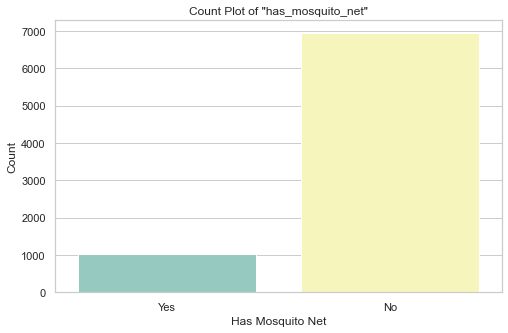

In [41]:
# Household has a mosquito net

# Mapping the variable labels to the column
household_has_mosquito_net = df_cleaned['has_mosquito_net'].map(variable_label_has_net).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='has_mosquito_net', data=household_has_mosquito_net, palette="Set3")
plt.title('Count Plot of "has_mosquito_net"')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Count')
plt.show()

In [42]:
# correlation_matrix = malaria_df.corr()
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# plt.title("One-Sided Correlation Matrix Heatmap")
# plt.show()

**1.1 Ownership of Insecticide-treated nets:**


In [43]:
# Calling the function to get variable labels
variable_label_itn = get_variable_label('na_net_treatment_status',df_excel, variable_label)
variable_label_itn

**2. Place where Household Prepares Food**

In [44]:
# Household food prep place
# Calling the function to get variable labels
variable_label_has_food_prep = get_variable_label('food_prep_place',df_excel, variable_label)
variable_label_has_food_prep

{1.0: 'In the house',
 2.0: 'In a separate building',
 3.0: 'Outdoors',
 6.0: 'Other'}

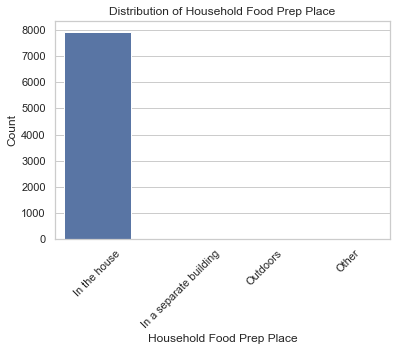

In [45]:
# Converting to category type
# df_cleaned['food_prep_place'] = df_cleaned['food_prep_place'].astype('category')

# Mapping the variable labels to the column
food_prep_place = df_cleaned['food_prep_place'].map(variable_label_has_food_prep).reset_index()

# Get all unique categories
all_categories = variable_label_has_food_prep.values()

# Create a Series with all categories and counts, filling NaN with 0
category_counts_all = df_cleaned['food_prep_place'].value_counts().reindex(all_categories, fill_value=0)

# Set the style of seaborn
sns.set(style="whitegrid")

sns.countplot(x='food_prep_place', data=food_prep_place, order=category_counts_all.index)
plt.xlabel('Household Food Prep Place')
plt.ylabel('Count')
plt.title('Distribution of Household Food Prep Place')
plt.xticks(rotation=45)
plt.show()

In [46]:
# # Sanity check
# food_prep_place.nunique()

**3. Malaria Zone Distribution**

In [47]:
# Malaria Zone
# Calling the function to get variable labels
variable_label__malaria_zone = get_variable_label('malaria_endemicity_zone',df_excel, variable_label)
variable_label__malaria_zone

{1.0: 'Highland Epidemic Prone',
 2.0: 'Lake Endemic',
 3.0: 'Coastal Endemic',
 4.0: 'Seasonal',
 5.0: 'Low Risk'}

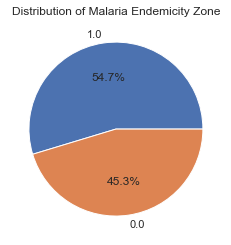

In [48]:
# Plotting the count plot
plt.pie(df_cleaned['malaria_endemicity_zone'].value_counts(), labels=df_cleaned['malaria_endemicity_zone'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Malaria Endemicity Zone')
plt.show()

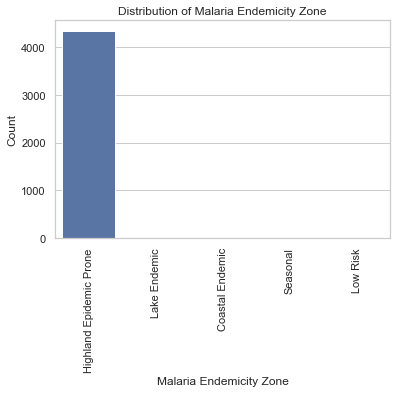

In [49]:
# Mapping the variable labels to the column
malaria_endemicity_zone = df_cleaned['malaria_endemicity_zone'].map(variable_label__malaria_zone).reset_index()

# Get all unique categories
all_categories = variable_label__malaria_zone.values()

# Create a Series with all categories and counts, filling NaN with 0
category_counts_all = df_cleaned['malaria_endemicity_zone'].value_counts().reindex(all_categories, fill_value=0)

# Set the style of seaborn
sns.set(style="whitegrid")

# Countplot
sns.countplot(x='malaria_endemicity_zone', data=malaria_endemicity_zone, order=category_counts_all.index)
plt.xlabel('Malaria Endemicity Zone')
plt.ylabel('Count')
plt.title('Distribution of Malaria Endemicity Zone')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


**4. Regional Residence**

In [50]:
# Calling the function to get variable labels
variable_label_place = get_variable_label('type_of_place',df_excel, variable_label)
variable_label_place

{1.0: 'Urban', 2.0: 'Rural'}

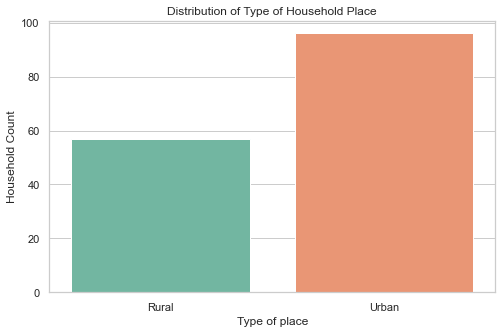

In [51]:
# Mapping the variable labels to the column
household_type_of_place = df_cleaned['type_of_place'].map(variable_label_place).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='type_of_place', data=household_type_of_place, palette="Set2")
plt.title('Distribution of Type of Household Place')
plt.xlabel('Type of place')
plt.ylabel('Household Count')
plt.show()

**5. Main Source of Household Drinking Water**

In [52]:
variable_label_water_source = get_variable_label('main_source_drink_water', df_excel, variable_label)
variable_label_water_source

{10.0: 'PIPED WATER',
 11.0: 'Piped into dwelling',
 12.0: 'Piped to yard/plot',
 13.0: 'Piped to neighbor',
 14.0: 'Public tap/standpipe',
 20.0: 'TUBE WELL WATER',
 21.0: 'Tube well or borehole',
 30.0: 'DUG WELL (OPEN/PROTECTED)',
 31.0: 'Protected well',
 32.0: 'Unprotected well',
 40.0: 'SURFACE FROM SPRING',
 41.0: 'Protected spring',
 42.0: 'Unprotected spring',
 43.0: 'River/dam/lake/ponds/stream/canal/irrigation channel',
 51.0: 'Rainwater',
 61.0: 'Tanker truck',
 62.0: 'Cart with small tank',
 71.0: 'Bottled water',
 96.0: 'Other'}

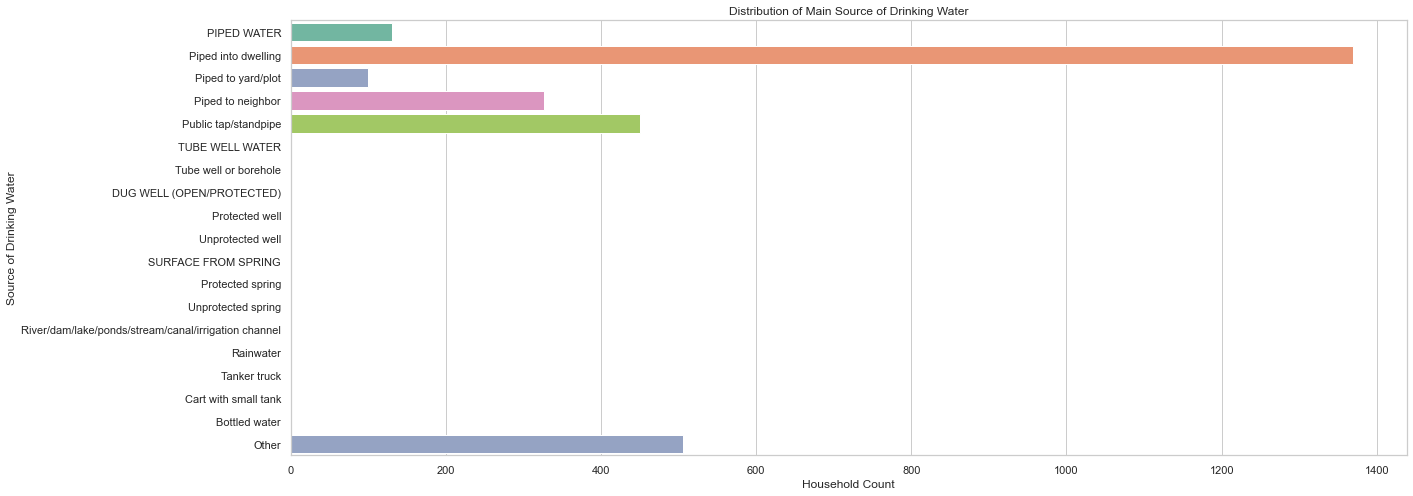

In [53]:
# # Mapping the variable labels to the column
household_water_source = df_cleaned['main_source_drink_water'].map(variable_label_water_source).reset_index()

# Get all unique categories
all_categories = variable_label_water_source.values()

# Create a Series with all categories and counts, filling NaN with 0
category_counts_all = df_cleaned['main_source_drink_water'].value_counts().reindex(all_categories, fill_value=0)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(20, 8))
sns.countplot(y='main_source_drink_water', data=household_water_source, order=category_counts_all.index, palette="Set2",)
plt.title('Distribution of Main Source of Drinking Water', )
plt.ylabel('Source of Drinking Water')
plt.xlabel('Household Count')
plt.show()

In [54]:
variable_label_wealth_index = get_variable_label('wealth_index_factor_urban_rural', df_excel, variable_label)
variable_label_wealth_index

In [55]:
df_cleaned['wealth_index_factor_urban_rural'].value_counts()

wealth_index_factor_urban_rural
1.0    7048
0.0     904
Name: count, dtype: int64

In [56]:
variable_label_insecticide_treated_nets = get_variable_label('insecticide_treated_net',
                                                             df_excel, variable_label)
variable_label_insecticide_treated_nets

**Feature Engineering**
* Age
* Economic Status (Wealth Index)
* 

## 2.4) Building Model

* Model Interpretability and Explainability:

Enhance model interpretability to provide actionable insights for decision-makers by employing techniques such as SHAP values or feature importance analysis.


## 2.5) Conclusion

## 2.6) Recommendation

## 2.7) Model Deployment